In [6]:
# import matplotlib.pyplot as plt

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.size": 14,
#     "axes.labelsize": 16,
#     "axes.titlesize": 16,
#     "legend.fontsize": 13,
#     "xtick.labelsize": 13,
#     "ytick.labelsize": 13,
#     "lines.linewidth": 1.5,
#     "axes.linewidth": 1.2,
# })

getdist_settings = {
    'smooth_scale_1D': 0.3,
    'smooth_scale_2D': 0.4,
    'boundary_correction_order': 1,
    'mult_bias_correction_order': 1,
    'alphas' : 0.2
    }

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import getdist
from getdist import plots, MCSamples

In [49]:
# Parameters
a, b = -0.6, 0.6            # Range for theta
# sigma = 2.0             # Gaussian noise standard deviation
x_obs = np.array([1.0, 1.0])  # Observed data point (x1, x2)

# Model definition
theta = np.linspace(a, b, 5000)
x2 = theta+2
x1 = 3+2*(theta)**3
model_points = np.vstack((x1, x2)).T  # Shape: (N, 2)

# Likelihood under 2D isotropic Gaussian
# diff = model_points - x_obs
# likelihood = np.exp(-0.5 * np.sum((diff / sigma)**2, axis=1))



# Pick a theta and compute its corresponding point
sigma = 0.04  # Standard deviation for the Gaussian noise


# Sample from 2D Gaussian centered at m(theta0)
n_samples = 100

all_samples = np.empty((0, 2))

for i in np.linspace(a,b,50):
    theta0 = i
    x2_0 = theta0 + 2
    x1_0 = 3 + 2 * (theta0)**3
    mean = np.array([x2_0, x1_0])
    cov = np.eye(2) * sigma**2
    samples = np.random.multivariate_normal(mean, cov, size=n_samples*10)
    all_samples = np.vstack((all_samples, samples))


In [50]:
print(all_samples)

[[1.35338757 2.61695226]
 [1.39862227 2.59255778]
 [1.41604486 2.57379759]
 ...
 [2.63847327 3.40008453]
 [2.53670742 3.43801039]
 [2.54902623 3.43924571]]


In [51]:
samps = MCSamples(samples=all_samples,names = ['x1','x2'],labels = [r'x_1',r'x_2'])
samps.updateSettings(getdist_settings)
samps.updateBaseStatistics()

Removed no burn in


((0.9617526798397658, 3.041678859273195),
 (2.421100466301862, 3.582846617671602))

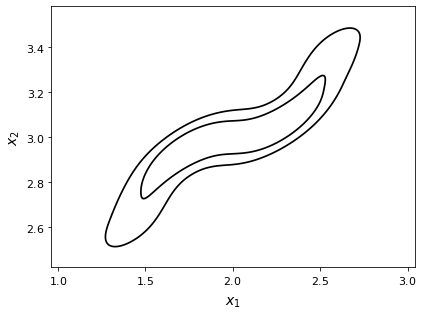

In [55]:
g = plots.get_single_plotter()
g.plot_2d(samps, 'x1','x2')

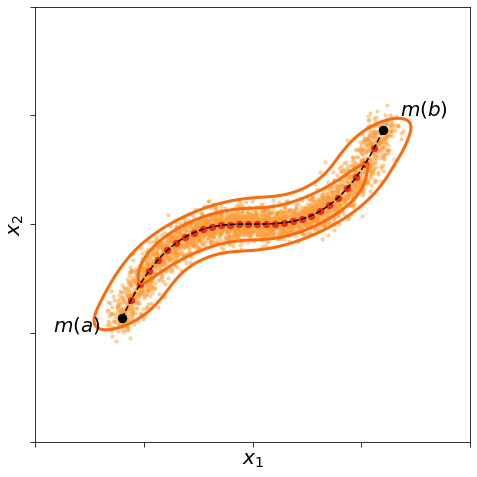

In [74]:
# Sample from 2D Gaussian centered at m(theta0)
n_samples = 100
# samples = np.random.multivariate_normal(mean, cov, size=n_samples)

# g = plots.get_single_plotter(width_inch=10)


fig, ax = plt.subplots(figsize=(10,8))
g.plot_2d(samps, 'x1', 'x2', ax=ax, colors=["#F96B0D"],lws = [3])

for i in np.linspace(a,b,30):
    theta0 = i
    x2_0 = theta0 + 2
    x1_0 = 3 + 2 * (theta0)**3
    mean = np.array([x2_0, x1_0])
    cov = np.eye(2) * sigma**2
    samples = np.random.multivariate_normal(mean, cov, size=n_samples)
    plt.scatter(samples[:,0], samples[:,1],marker = 'o', alpha=0.4, color='#FB9E3A',s=10)

plt.plot(x2, x1 , color="#000000",linestyle = '--', label=r'$m(\theta)$',linewidth = 1.5)

for i in np.linspace(a,b,30):
    theta0 = i
    x2_0 = theta0 + 2
    x1_0 = 3 + 2 * (theta0)**3
    plt.scatter(x2_0, x1_0, color="#EA2F14",s=40, marker='o')

plt.scatter(x2[0], x1[0], s=70 , color='k')
plt.scatter(x2[-1], x1[-1], s=70 , color='k')



# ax.set_xlabel(r'$X_1$')
# ax.set_ylabel(r'$X_2$')

# plt.legend(frameon=False)
# 创建或获取当前的 axes
plt.xlim(1, 3)
plt.ylim(2, 4)
ax = plt.gca()

ax.tick_params(axis='x', which='both', length=5)  # 设置x轴刻度线长度
ax.tick_params(axis='x', labelbottom=False)     # 不显示x轴标签
ax.tick_params(axis='y', which='both', length=5)  # 设置y轴刻度线长度
ax.tick_params(axis='y', labelleft=False)         # 不显示y轴标签

# 设置坐标轴比例为 1:1，使图像成为正方形
ax.set_aspect('equal')

ax.text(x2[0]-0.1, x1[0]-0.08, r'$m(a)$', fontsize=20, va='bottom', ha='right')
ax.text(x2[-1]+0.08, x1[-1]+0.05, r'$m(b)$', fontsize=20, va='bottom', ha='left')
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)
# plt.tight_layout()
plt.savefig("BDA.pdf", bbox_inches='tight')
plt.show()


In [62]:
# Pick a theta and compute its corresponding point
sigma = 0.1  # Standard deviation for the Gaussian noise

theta0 = 0.2
x2_0 = theta0 + 2
x1_0 = 3 + 2 * (theta0)**3
mean = np.array([x2_0, x1_0])
cov = np.eye(2) * sigma**2

# Sample from 2D Gaussian centered at m(theta0)
n_samples = 500
samples = np.random.multivariate_normal(mean, cov, size=n_samples)


ax.scatter(samples[:,0], samples[:,1], alpha=0.4, color='blue', label='Samples')
ax.scatter(x1_0, x2_0, color='red', s=80, marker='x', label='Mean $(x_1, x_2)$')


(x1_0, x2_0)

(3.016, 2.2)

In [54]:
# Pick a theta and compute its corresponding point
sigma = 1.0  # Standard deviation for the Gaussian noise

theta0 = 0.2
x2_0 = theta0 + 2
x1_0 = 3 + 2 * (theta0)**3
mean = np.array([x1_0, x2_0])
cov = np.eye(2) * sigma**2

# Sample from 2D Gaussian centered at m(theta0)
n_samples = 500
samples = np.random.multivariate_normal(mean, cov, size=n_samples)

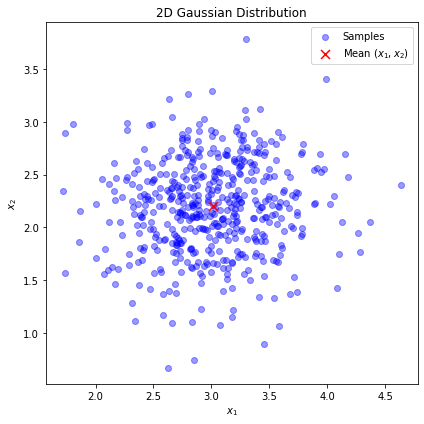

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and covariance
mean = np.array([x1_0, x2_0])  # Use your desired mean values
cov = np.array([[0.2, 0.0], [0.0, 0.2]])  # Example: identity covariance

# Generate samples
n_samples = 500
samples = np.random.multivariate_normal(mean, cov, size=n_samples)

# Plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(samples[:,0], samples[:,1], alpha=0.4, color='blue', label='Samples')
ax.scatter(mean[0], mean[1], color='red', s=80, marker='x', label='Mean $(x_1, x_2)$')

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.legend()
ax.set_title('2D Gaussian Distribution')
plt.tight_layout()
plt.show()

In [29]:
import tensiometer.utilities as utils




In [33]:
dir(utils)

['KL_decomposition',
 'MCSamples',
 'PDM_to_vector',
 'QR_inverse',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bernoulli_thin',
 'clopper_pearson_binomial_trial',
 'filter_kwargs',
 'from_chi2_to_sigma',
 'from_confidence_to_sigma',
 'from_sigma_to_confidence',
 'get_separate_mcsamples',
 'inspect',
 'is_outlier',
 'make_list',
 'np',
 'random_samples_reshuffle',
 'scipy',
 'sqrtm',
 'vector_to_PDM',
 'whiten_samples']